In [1]:
#All imports used
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [2]:
train_df = pd.read_csv('../Datasets/application_train.csv')

train_df['CLIENT_AGE'] = train_df['DAYS_BIRTH'] / -365

train_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train_df['YEARS_EMPLOYED'] = train_df['DAYS_EMPLOYED'] / -365243

train_df.drop(columns=['DAYS_EMPLOYED','DAYS_BIRTH'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,0.001744
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,0.003253
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.000616
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.068493,0.008320
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,0.008318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,25.553425,0.000646
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,56.917808,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,41.002740,0.021687
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,32.769863,0.013104


In [3]:
train_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'CLIENT_AGE', 'YEARS_EMPLOYED'],
      dtype='object', length=124)

In [4]:
train_df.shape

(307511, 124)

In [5]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 


k = missing_data(train_df)

In [6]:
k[k["Percent"]<50]

,Total,Percent
FLOORSMAX_MODE,153020,49.760822
FLOORSMAX_AVG,153020,49.760822
FLOORSMAX_MEDI,153020,49.760822
YEARS_BEGINEXPLUATATION_MODE,150007,48.781019
YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019
...,...,...
AMT_INCOME_TOTAL,0,0.000000
CNT_CHILDREN,0,0.000000
FLAG_OWN_REALTY,0,0.000000
ORGANIZATION_TYPE,0,0.000000


In [7]:
k[k["Percent"]<0.5]
train_df=train_df[k[k["Percent"]<5].index]

In [8]:
from sklearn.preprocessing import OrdinalEncoder

for i in train_df.select_dtypes(include='object').columns:
    enc = OrdinalEncoder()
    #print(train_df[i])
    train_df[i].fillna(train_df[i].mode()[0], inplace=True)
    train_df[i]= enc.fit_transform(train_df[[i]])

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [10]:
train_df.fillna(0, inplace=True)
y = train_df["TARGET"]
X = train_df.drop(columns="TARGET")

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [12]:
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1)
sel = SelectFromModel(model)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1))

In [13]:
train_df.select_dtypes(include='object').columns

Index([], dtype='object')

In [14]:
for i in train_df.select_dtypes(include='object').columns:
    enc = OrdinalEncoder()
    train_df[i]= enc.fit_transform(train_df[[i]])

In [15]:
for i in train_df.select_dtypes(include='object').columns:
    print(i)

In [16]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

19

In [17]:
print(selected_feat)

Index(['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'CLIENT_AGE', 'HOUR_APPR_PROCESS_START',
       'WEEKDAY_APPR_PROCESS_START', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
       'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE', 'NAME_FAMILY_STATUS',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE', 'SK_ID_CURR'],
      dtype='object')


<AxesSubplot:>

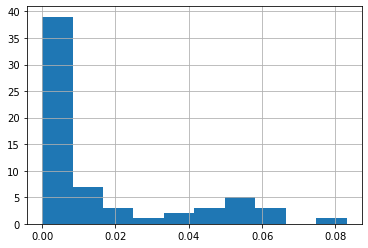

In [18]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

In [19]:
y = train_df["TARGET"]
X = train_df[selected_feat[:].values]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
y_RF_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

cf_matrix = confusion_matrix(y_test, y_RF_predicted)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print(f'Precision score: {round(precision_score(y_test, y_RF_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_RF_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_RF_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_RF_predicted), 3)}')

In [ ]:
roc_auc_score(y_test, y_RF_predicted)

In [ ]:
#from sklearn.model_selection import cross_validate
#import numpy as np

#cv_results = cross_validate(model, X, y, cv=4, scoring='neg_mean_squared_error', return_train_score=True)
#cv_results

## Model with over sampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()

In [ ]:
y = train_df["TARGET"]
X = train_df.drop(columns="TARGET")
X,y=oversample.fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
y_RF_predicted = model.predict(X_test)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_RF_predicted)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print(f'Precision score: {round(precision_score(y_test, y_RF_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_RF_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_RF_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_RF_predicted), 3)}')

In [ ]:
roc_auc_score(y_test, y_RF_predicted)

## Model with under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersampler = RandomUnderSampler()

In [ ]:
y = train_df["TARGET"]
X = train_df.drop(columns="TARGET")
X,y=undersampler.fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model_u = RandomForestClassifier(n_estimators = 100,n_jobs=-1)
model_u.fit(X_train, y_train)

In [ ]:
model_u.score(X_test,y_test)

In [ ]:
y_RF_predicted = model_u.predict(X_test)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_RF_predicted)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print(f'Precision score: {round(precision_score(y_test, y_RF_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_RF_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_RF_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_RF_predicted), 3)}')

In [ ]:
roc_auc_score(y_test, y_RF_predicted)

## model with train and test

In [ ]:
#y_test = test_df["TARGET"]
#X_tes = test_df[selected_feat[:].values]

In [ ]:
train_df = pd.read_csv('../Datasets/application_train.csv')

train_df['CLIENT_AGE'] = train_df['DAYS_BIRTH'] / -365

train_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train_df['YEARS_EMPLOYED'] = train_df['DAYS_EMPLOYED'] / -365243

In [ ]:
train_df[selected_feat[:].values]

In [ ]:
selected_feat[:].values

In [ ]:
k = missing_data(train_df[selected_feat[:].values])

In [ ]:
k

In [ ]:
sel.estimator_.feature_importances_.ravel()

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(train_df[selected_feat[:].values], sel.estimator_.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values( 'Gini-importance',ascending=False)



In [ ]:
importances.sort_values( 'Gini-importance',ascending=False)

In [ ]:
train_df.mode()